In [1]:
'''
Clustering: Hierarchical
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply Hierarchical clustering algorithms (based on effective_literacy_rate_total column) to find the group of customers.
'''

'\nClustering: Hierarchical\nDataset: Cities_r2.csv \nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply Hierarchical clustering algorithms (based on effective_literacy_rate_total column) to find the group of customers.\n'

In [18]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [19]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\cities_r2.csv')

data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [20]:
data.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

In [21]:
# extract and scale the required column
X = data[['effective_literacy_rate_total']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

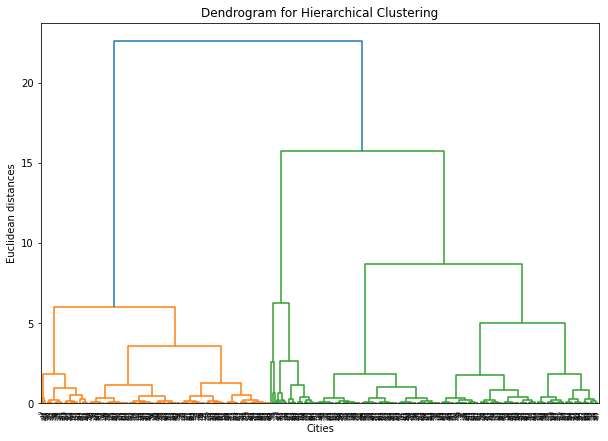

In [22]:
# dendrogram to determine optimal clusters
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel('Cities')
plt.ylabel('Euclidean distances')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

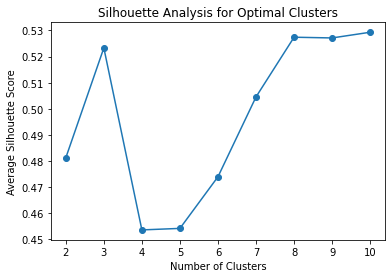

In [23]:
range_n_clusters = range(2, 11)
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

In [26]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster'] = hierarchical_clustering.fit_predict(X_scaled)

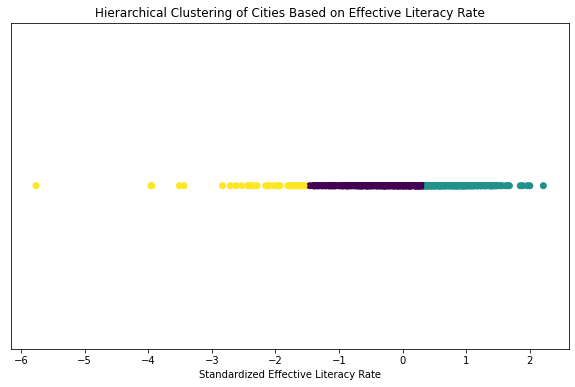

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, [0]*len(X_scaled), c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering of Cities Based on Effective Literacy Rate')
plt.xlabel('Standardized Effective Literacy Rate')
plt.yticks([])
plt.show()

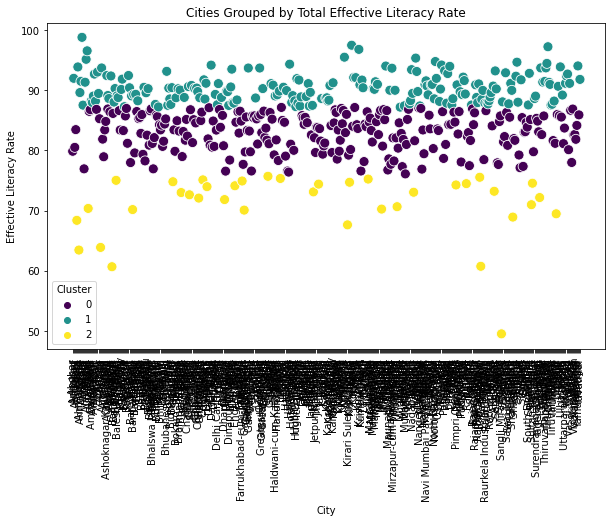

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['name_of_city'], y=data['effective_literacy_rate_total'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Cities Grouped by Total Effective Literacy Rate')
plt.xlabel('City')
plt.ylabel('Effective Literacy Rate')
plt.xticks(rotation=90)
plt.show()

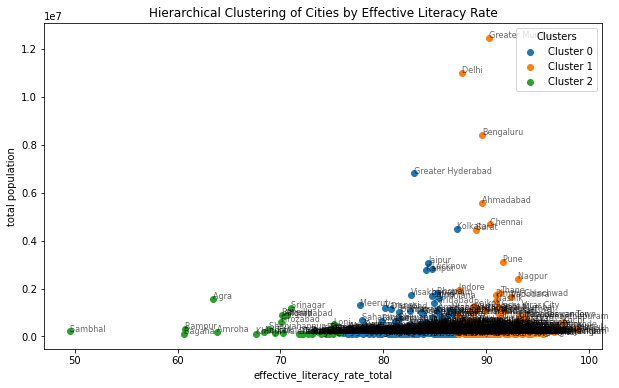

In [34]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['effective_literacy_rate_total'], 
                cluster_data['population_total'], 
                label=f"Cluster {cluster}")

for i, city in enumerate(data['name_of_city'])    :
    plt.annotate(city, (data['effective_literacy_rate_total'][i], data['population_total'][i]), fontsize=8, alpha=0.6)
    
plt.xlabel('effective_literacy_rate_total')
plt.ylabel('total population')
plt.legend(title='Clusters')
plt.title('Hierarchical Clustering of Cities by Effective Literacy Rate')
plt.show()